In [62]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
data = pd.read_excel('f.xlsx')
data = data.set_index("ID")
data = data.drop("PatientID",axis=1)

In [3]:
data

,Age,Gender,Menopuase,Education,Weigth,Heigth,BMI,Add.before,Add.after,Smoke,...,CareLevel,DateOfCathDysfunc,Duration_Surg_Dysfunc,Diagnosis,DateOfCathDysfunc_A,Duration_between_Dysfuncs,Infection,Thrombosis,Duration,Durationmix
ID,,,,,,,,,,,,,,,,,,,,,
89,51,Male,N-D,literate,92.0,173.0,30.73,0.0,5.0,no,...,2.0,Not yet,NaN,Works,1393/12/24,NaN,0,0.0,1116.0,1116.0
654,82,Male,N-D,literate,NaN,NaN,NaN,0.0,0.0,no,...,3.0,not yet,NaN,Works,1394/09/03,NaN,0,0.0,1044.0,1044.0
698,79,Male,N-D,literate,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,not yet,NaN,Works,1394/05/24,NaN,0,0.0,984.0,984.0
503,51,Female,no,iliterate,94.0,154.0,39.63,1.0,1.0,NaN,...,NaN,NaN,NaN,Works,1397/01/21,NaN,0,0.0,950.0,950.0
696,41,Female,no,literate,33.0,138.0,17.32,1.0,1.0,no,...,NaN,not yet,NaN,Works,1394/12/13,NaN,0,0.0,940.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,77,Female,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Infection,NaN,NaN,1,0.0,NaN,NaN
976,78,Female,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Infection,NaN,NaN,1,0.0,NaN,NaN
983,53,Female,yes,literate,67.5,151.0,29.60,0.0,0.0,NaN,...,NaN,NaN,NaN,Infection,not yet,NaN,1,0.0,NaN,NaN


### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 89 to 1037
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        466 non-null    int64  
 1   Gender                     466 non-null    object 
 2   Menopuase                  466 non-null    object 
 3   Education                  388 non-null    object 
 4   Weigth                     217 non-null    float64
 5   Heigth                     206 non-null    float64
 6   BMI                        206 non-null    float64
 7   Add.before                 408 non-null    float64
 8   Add.after                  407 non-null    float64
 9   Smoke                      281 non-null    object 
 10  BPhigh                     255 non-null    float64
 11  BPlow                      255 non-null    float64
 12  CABG                       466 non-null    object 
 13  CVA                        466 non-null    object 
 1

In [5]:
# Calculate the threshold for missing values
threshold = len(data) * 0.5  # 40% threshold

# Drop columns with missing values above the threshold
df_cleaned = data.dropna(axis=1, thresh=threshold)

In [6]:
df_cleaned

,Age,Gender,Menopuase,Education,Add.before,Add.after,Smoke,BPhigh,BPlow,CABG,...,Dateofsurgery,CathSide,CathTipLoc,DateOfCathDysfunc,Duration_Surg_Dysfunc,Diagnosis,DateOfCathDysfunc_A,Infection,Thrombosis,Durationmix
ID,,,,,,,,,,,,,,,,,,,,,
89,51,Male,N-D,literate,0.0,5.0,no,170.0,60.0,no,...,1397/01/10,Right,Jugular,Not yet,NaN,Works,1393/12/24,0,0.0,1116.0
654,82,Male,N-D,literate,0.0,0.0,no,120.0,80.0,no,...,1397/07/12,right,Jugular,not yet,NaN,Works,1394/09/03,0,0.0,1044.0
698,79,Male,N-D,literate,0.0,0.0,NaN,160.0,90.0,no,...,1397/02/03,right,Jugular,not yet,NaN,Works,1394/05/24,0,0.0,984.0
503,51,Female,no,iliterate,1.0,1.0,NaN,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,Works,1397/01/21,0,0.0,950.0
696,41,Female,no,literate,1.0,1.0,no,130.0,80.0,no,...,1397/07/08,left,Jugular,not yet,NaN,Works,1394/12/13,0,0.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,77,Female,yes,NaN,NaN,NaN,NaN,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,Infection,NaN,1,0.0,NaN
976,78,Female,yes,NaN,NaN,NaN,NaN,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,Infection,NaN,1,0.0,NaN
983,53,Female,yes,literate,0.0,0.0,NaN,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,Infection,not yet,1,0.0,NaN


In [7]:
df_cleaned.columns

Index(['Age', 'Gender', 'Menopuase', 'Education', 'Add.before', 'Add.after',
       'Smoke', 'BPhigh', 'BPlow', 'CABG', 'CVA', 'CHF', 'DM', 'HTN',
       'hyperlipidemia', 'IHD', 'Angioplasty', 'Anemia', 'Dialysis',
       'Dilysis.Number', 'Dateofsurgery', 'CathSide', 'CathTipLoc',
       'DateOfCathDysfunc', 'Duration_Surg_Dysfunc', 'Diagnosis',
       'DateOfCathDysfunc_A', 'Infection', 'Thrombosis', 'Durationmix'],
      dtype='object')

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 89 to 1037
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    466 non-null    int64  
 1   Gender                 466 non-null    object 
 2   Menopuase              466 non-null    object 
 3   Education              388 non-null    object 
 4   Add.before             408 non-null    float64
 5   Add.after              407 non-null    float64
 6   Smoke                  281 non-null    object 
 7   BPhigh                 255 non-null    float64
 8   BPlow                  255 non-null    float64
 9   CABG                   466 non-null    object 
 10  CVA                    466 non-null    object 
 11  CHF                    466 non-null    object 
 12  DM                     466 non-null    object 
 13  HTN                    466 non-null    object 
 14  hyperlipidemia         466 non-null    object 
 15  IHD      

In [9]:
# Separate categorical and numerical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
numerical_columns = df_cleaned.select_dtypes(exclude=['object']).columns
categorical_data = df_cleaned[categorical_columns]
numerical_data = df_cleaned[numerical_columns]

### numerical_columns

In [10]:
numerical_columns

Index(['Age', 'Add.before', 'Add.after', 'BPhigh', 'BPlow', 'Dilysis.Number',
       'Duration_Surg_Dysfunc', 'Infection', 'Thrombosis', 'Durationmix'],
      dtype='object')

In [11]:
for col in numerical_columns:
    stat, p = shapiro(df_cleaned[col])
    print(f'Shapiro-Wilk Test for {col}: p-value={p}')

Shapiro-Wilk Test for Age: p-value=1.640581892559112e-08
Shapiro-Wilk Test for Add.before: p-value=1.0
Shapiro-Wilk Test for Add.after: p-value=1.0
Shapiro-Wilk Test for BPhigh: p-value=1.0
Shapiro-Wilk Test for BPlow: p-value=1.0
Shapiro-Wilk Test for Dilysis.Number: p-value=1.0
Shapiro-Wilk Test for Duration_Surg_Dysfunc: p-value=1.0
Shapiro-Wilk Test for Infection: p-value=7.766807824673606e-33
Shapiro-Wilk Test for Thrombosis: p-value=1.0
Shapiro-Wilk Test for Durationmix: p-value=1.0


In [12]:
def replace_outliers_with_distribution(df,numerical_columns):
    for col in numerical_columns:
        # Specify the column containing your data
        column_data = df[col]

        # Calculate the IQR (Interquartile Range)
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for identifying outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers based on the bounds
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

        # Perform the Shapiro-Wilk test for normality
        stat, p = shapiro(column_data)

        # Define the significance level (alpha)
        alpha = 0.05

        if p <= alpha:
            # If not normally distributed, replace outliers with the median
            median_value = column_data.median()
            df[col][outliers.index] = median_value
            print(f"Replaced outliers in '{col}' with median value.")
        else:
            # If normally distributed, replace outliers with the mean (average)
            mean_value = column_data.mean()
            df[col][outliers.index] = mean_value
            print(f"Replaced outliers in '{col}' with mean value.")

    return df


In [13]:
# Call the function to replace outliers in your DataFrame
df_cleaned_befor_normalize = replace_outliers_with_distribution(df_cleaned,numerical_columns=numerical_columns)

Replaced outliers in 'Age' with median value.
Replaced outliers in 'Add.before' with mean value.
Replaced outliers in 'Add.after' with mean value.
Replaced outliers in 'BPhigh' with mean value.
Replaced outliers in 'BPlow' with mean value.
Replaced outliers in 'Dilysis.Number' with mean value.
Replaced outliers in 'Duration_Surg_Dysfunc' with mean value.
Replaced outliers in 'Infection' with median value.
Replaced outliers in 'Thrombosis' with mean value.
Replaced outliers in 'Durationmix' with mean value.


C:\Users\Behnam\AppData\Local\Temp\ipykernel_520\1703239376.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] = median_value
C:\Users\Behnam\AppData\Local\Temp\ipykernel_520\1703239376.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] = mean_value
C:\Users\Behnam\AppData\Local\Temp\ipykernel_520\1703239376.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] 

### Categorical_columns

In [14]:
categorical_columns

Index(['Gender', 'Menopuase', 'Education', 'Smoke', 'CABG', 'CVA', 'CHF', 'DM',
       'HTN', 'hyperlipidemia', 'IHD', 'Angioplasty', 'Anemia', 'Dialysis',
       'Dateofsurgery', 'CathSide', 'CathTipLoc', 'DateOfCathDysfunc',
       'Diagnosis', 'DateOfCathDysfunc_A'],
      dtype='object')

In [15]:
specific_row = df_cleaned[df_cleaned['DateOfCathDysfunc'] == 'not yet']

In [16]:
specific_row

,Age,Gender,Menopuase,Education,Add.before,Add.after,Smoke,BPhigh,BPlow,CABG,...,Dateofsurgery,CathSide,CathTipLoc,DateOfCathDysfunc,Duration_Surg_Dysfunc,Diagnosis,DateOfCathDysfunc_A,Infection,Thrombosis,Durationmix
ID,,,,,,,,,,,,,,,,,,,,,
654,82.0,Male,N-D,literate,0.000000,0.000000,no,120.0,80.00000,no,...,1397/07/12,right,Jugular,not yet,NaN,Works,1394/09/03,0,0.0,305.904192
698,79.0,Male,N-D,literate,0.000000,0.000000,NaN,160.0,90.00000,no,...,1397/02/03,right,Jugular,not yet,NaN,Works,1394/05/24,0,0.0,305.904192
696,41.0,Female,no,literate,1.000000,1.000000,no,130.0,80.00000,no,...,1397/07/08,left,Jugular,not yet,NaN,Works,1394/12/13,0,0.0,305.904192
203,66.0,Male,N-D,literate,2.000000,1.000000,no,110.0,70.00000,no,...,1397/01/28,Right,Jugular,not yet,NaN,Works,1394/08/12,0,0.0,305.904192
145,42.0,Female,no,literate,0.000000,0.000000,no,140.0,80.00000,no,...,1397/02/03,Right,Jugular,not yet,NaN,Works,Not yet,0,0.0,817.000000
146,32.0,Male,N-D,literate,0.000000,0.000000,no,160.0,90.00000,no,...,1397/02/03,Right,Jugular,not yet,NaN,Works,not yet,0,0.0,817.000000
150,57.0,Male,N-D,literate,0.000000,4.000000,no,90.0,75.54902,no,...,1397/02/08,Right,Jugular,not yet,NaN,Works,NaN,0,0.0,812.000000
681,64.0,Male,N-D,NaN,0.000000,0.000000,no,150.0,90.00000,no,...,1397/04/26,right,Jugular,not yet,NaN,Works,not yet,0,0.0,734.000000
680,62.0,Female,yes,iliterate,0.000000,0.000000,no,110.0,60.00000,no,...,1397/06/10,right,Jugular,not yet,NaN,Works,Not yet,0,0.0,690.000000


In [17]:
# Separate categorical and numerical columns after del some colmns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
numerical_columns = df_cleaned.select_dtypes(exclude=['object']).columns
categorical_data = df_cleaned[categorical_columns]
numerical_data = df_cleaned[numerical_columns]

In [18]:
df_cleaned.columns

Index(['Age', 'Gender', 'Menopuase', 'Education', 'Add.before', 'Add.after',
       'Smoke', 'BPhigh', 'BPlow', 'CABG', 'CVA', 'CHF', 'DM', 'HTN',
       'hyperlipidemia', 'IHD', 'Angioplasty', 'Anemia', 'Dialysis',
       'Dilysis.Number', 'Dateofsurgery', 'CathSide', 'CathTipLoc',
       'DateOfCathDysfunc', 'Duration_Surg_Dysfunc', 'Diagnosis',
       'DateOfCathDysfunc_A', 'Infection', 'Thrombosis', 'Durationmix'],
      dtype='object')

In [19]:
# del date columns because we have Durationmix
df_cleaned = df_cleaned.drop(['DateOfCathDysfunc','Duration_Surg_Dysfunc','Dateofsurgery','DateOfCathDysfunc_A'],axis=1)

In [20]:
# del 'Infection', 'Thrombosis' because we have in 'Diagnosis'
df_cleaned = df_cleaned.drop(['Infection', 'Thrombosis'],axis=1)

In [21]:
df_cleaned.Diagnosis

ID
89          Works
654         Works
698         Works
503         Works
696         Works
          ...    
968     Infection
976     Infection
983     Infection
1016    Infection
1037    Infection
Name: Diagnosis, Length: 466, dtype: object

In [22]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
categorical_data = df_cleaned[categorical_columns]

In [23]:
categorical_data

,Gender,Menopuase,Education,Smoke,CABG,CVA,CHF,DM,HTN,hyperlipidemia,IHD,Angioplasty,Anemia,Dialysis,CathSide,CathTipLoc,Diagnosis
ID,,,,,,,,,,,,,,,,,
89,Male,N-D,literate,no,no,no,no,yes,yes,no,no,no,no,no,Right,Jugular,Works
654,Male,N-D,literate,no,no,no,no,no,yes,no,no,no,no,no,right,Jugular,Works
698,Male,N-D,literate,NaN,no,no,no,no,no,no,no,no,no,NaN,right,Jugular,Works
503,Female,no,iliterate,NaN,no,no,no,no,no,no,no,no,no,NaN,NaN,NaN,Works
696,Female,no,literate,no,no,no,no,no,yes,no,no,no,no,NaN,left,Jugular,Works
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Female,yes,NaN,NaN,no,no,no,no,no,no,no,no,no,NaN,NaN,NaN,Infection
976,Female,yes,NaN,NaN,no,no,no,no,no,no,no,no,no,NaN,NaN,NaN,Infection
983,Female,yes,literate,NaN,no,no,no,no,no,no,no,no,no,NaN,NaN,NaN,Infection


In [24]:
category_codes = {}
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')
    # Create a mapping for the codes
    mapping = {cat: code for code, cat in enumerate(df_cleaned[col].cat.categories)}
    # Add None or NaN values to the mapping
    if None in df_cleaned[col].cat.categories:
        mapping[None] = None

    category_codes[col] = mapping
    # Apply the mapping to the column
    df_cleaned[col] = df_cleaned[col].map(mapping)

# Print the DataFrame with encoded categorical columns
print(df_cleaned.tail())


       Age Gender Menopuase Education  Add.before  Add.after Smoke  BPhigh  \
ID                                                                           
968   77.0      0         2       NaN         NaN        NaN   NaN     NaN   
976   78.0      0         2       NaN         NaN        NaN   NaN     NaN   
983   53.0      0         2         1    0.000000        0.0   NaN     NaN   
1016  51.0      0         1         1    2.000000        2.0   NaN     NaN   
1037  66.0      1         0         0    1.023284        2.0     0   120.0   

      BPlow CABG  ... hyperlipidemia IHD Angioplasty Anemia Dialysis  \
ID                ...                                                  
968     NaN    0  ...              0   0           0      0      NaN   
976     NaN    0  ...              0   0           0      0      NaN   
983     NaN    0  ...              0   0           0      0      NaN   
1016    NaN    0  ...              0   0           0      0      NaN   
1037   80.0    0  ...

In [25]:
category_codes

{'Gender': {'Female': 0, 'Male': 1},
 'Menopuase': {'N-D': 0, 'no': 1, 'yes': 2},
 'Education': {'iliterate': 0, 'literate': 1},
 'Smoke': {'no': 0, 'yes': 1},
 'CABG': {'no': 0, 'yes': 1},
 'CVA': {'no': 0, 'yes': 1},
 'CHF': {'no': 0, 'yes': 1},
 'DM': {'no': 0, 'yes': 1},
 'HTN': {'no': 0, 'yes': 1},
 'hyperlipidemia': {'no': 0},
 'IHD': {'no': 0, 'yes': 1},
 'Angioplasty': {'no': 0, 'yes': 1},
 'Anemia': {'no': 0, 'yes': 1},
 'Dialysis': {'no': 0, 'yes': 1},
 'CathSide': {'Left': 0, 'RIght': 1, 'Right': 2, 'left': 3, 'right': 4},
 'CathTipLoc': {'Femoral': 0, 'Jugular': 1, 'Subcl': 2},
 'Diagnosis': {'Infection': 0, 'Thrombosis': 1, 'Works': 2}}

In [26]:
df_cleaned.Menopuase.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [27]:
df_cleaned

,Age,Gender,Menopuase,Education,Add.before,Add.after,Smoke,BPhigh,BPlow,CABG,...,hyperlipidemia,IHD,Angioplasty,Anemia,Dialysis,Dilysis.Number,CathSide,CathTipLoc,Diagnosis,Durationmix
ID,,,,,,,,,,,,,,,,,,,,,
89,51.0,1,0,1,0.000000,5.0,0,170.0,60.0,0,...,0,0,0,0,0,3.0,2,1,2,305.904192
654,82.0,1,0,1,0.000000,0.0,0,120.0,80.0,0,...,0,0,0,0,0,NaN,4,1,2,305.904192
698,79.0,1,0,1,0.000000,0.0,NaN,160.0,90.0,0,...,0,0,0,0,NaN,NaN,4,1,2,305.904192
503,51.0,0,1,0,1.000000,1.0,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,2,305.904192
696,41.0,0,1,1,1.000000,1.0,0,130.0,80.0,0,...,0,0,0,0,NaN,NaN,3,1,2,305.904192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,77.0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN
976,78.0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN
983,53.0,0,2,1,0.000000,0.0,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN


## Data Preprocessing

In [29]:
# copy data with new name
df_clean_coded = df_cleaned.copy()

In [31]:
df_clean_coded.shape

(466, 24)

In [37]:
df_clean_coded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 89 to 1037
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             466 non-null    float64 
 1   Gender          466 non-null    category
 2   Menopuase       466 non-null    category
 3   Education       388 non-null    category
 4   Add.before      408 non-null    float64 
 5   Add.after       407 non-null    float64 
 6   Smoke           281 non-null    category
 7   BPhigh          255 non-null    float64 
 8   BPlow           255 non-null    float64 
 9   CABG            466 non-null    category
 10  CVA             466 non-null    category
 11  CHF             466 non-null    category
 12  DM              466 non-null    category
 13  HTN             466 non-null    category
 14  hyperlipidemia  466 non-null    category
 15  IHD             466 non-null    category
 16  Angioplasty     466 non-null    category
 17  Anemia          466

In [90]:
# Separate categorical and numerical columns
categorical_columns = df_clean_coded.select_dtypes(include=['category']).columns
numerical_columns = df_clean_coded.select_dtypes(include=['float64']).columns
categorical_data = df_clean_coded[categorical_columns]
numerical_data = df_clean_coded[numerical_columns]

In [91]:
def correlation_matrix(df):
    # Calculate the correlation matrix for numeric columns
    correlation_matrix = df.corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=(15, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

## Numerical Data

In [92]:
numerical_data

,Age,Add.before,Add.after,BPhigh,BPlow,Dilysis.Number,Durationmix
ID,,,,,,,
89,51.0,0.000000,5.0,170.0,60.0,3.0,305.904192
654,82.0,0.000000,0.0,120.0,80.0,NaN,305.904192
698,79.0,0.000000,0.0,160.0,90.0,NaN,305.904192
503,51.0,1.000000,1.0,NaN,NaN,NaN,305.904192
696,41.0,1.000000,1.0,130.0,80.0,NaN,305.904192
...,...,...,...,...,...,...,...
968,77.0,NaN,NaN,NaN,NaN,NaN,NaN
976,78.0,NaN,NaN,NaN,NaN,NaN,NaN
983,53.0,0.000000,0.0,NaN,NaN,NaN,NaN


In [93]:
df_numeric_no_null = numerical_data.dropna()

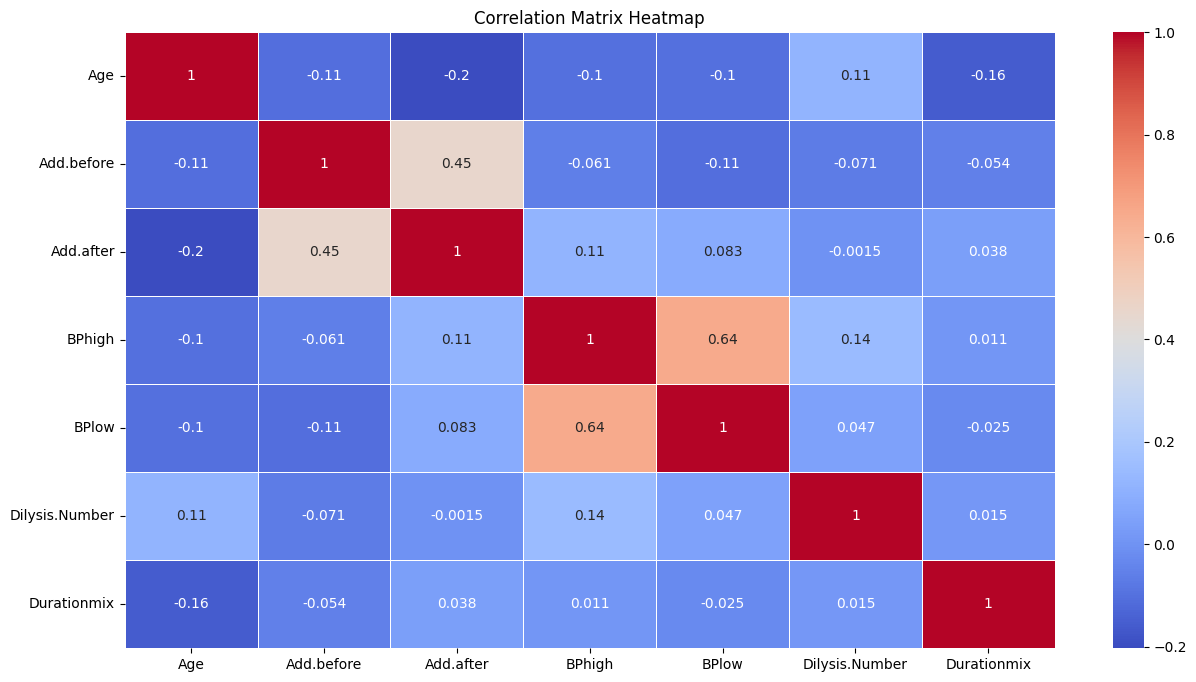

In [94]:
correlation_matrix(df_numeric_no_null)

### Categoroical Data

In [74]:
def check_corelation_category_col(col1,col2):

    # Create a contingency table
    contingency_table = pd.crosstab(col1, col2)

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2,p

In [79]:
no_null_data = categorical_data.dropna()

In [102]:
correlation_category = pd.DataFrame()

In [103]:
for col1 in categorical_columns:
    p_value = []
    for col2 in categorical_columns:
        chi2,p = check_corelation_category_col(no_null_data[col1],no_null_data[col2])
        p_value.append(p)
    correlation_category[col1] = p_value

In [105]:
correlation_category = correlation_category.set_index(categorical_columns)
correlation_category.style.background_gradient(cmap="Blues")

,Gender,Menopuase,Education,Smoke,CABG,CVA,CHF,DM,HTN,hyperlipidemia,IHD,Angioplasty,Anemia,Dialysis,CathSide,CathTipLoc,Diagnosis
Gender,0.000000,0.000000,0.006111,0.000040,0.657940,1.000000,0.955891,0.243212,0.958656,1.000000,0.923376,0.092026,1.000000,0.192984,0.162924,0.920005,0.000872
Menopuase,0.000000,0.000000,0.000000,0.000511,0.054134,0.428425,0.565826,0.000075,0.108060,1.000000,0.649183,0.000039,0.091387,0.243887,0.352423,0.282812,0.000142
Education,0.006111,0.000000,0.000000,0.835945,0.141357,0.043427,1.000000,0.007066,0.223358,1.000000,0.289217,0.458703,0.362791,0.131980,0.930880,0.432243,0.207170
Smoke,0.000040,0.000511,0.835945,0.000000,0.466232,1.000000,1.000000,0.666502,0.720956,1.000000,1.000000,1.000000,0.835578,0.456865,0.552390,0.654841,0.000679
CABG,0.657940,0.054134,0.141357,0.466232,0.000000,0.014381,1.000000,0.000726,0.707699,1.000000,1.000000,1.000000,1.000000,0.007406,0.495671,0.662249,0.307903
CVA,1.000000,0.428425,0.043427,1.000000,0.014381,0.000000,1.000000,0.041421,0.282806,1.000000,1.000000,1.000000,1.000000,1.000000,0.176107,0.000020,0.659597
CHF,0.955891,0.565826,1.000000,1.000000,1.000000,1.000000,0.000000,0.866589,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990827,0.975416,0.267274
DM,0.243212,0.000075,0.007066,0.666502,0.000726,0.041421,0.866589,0.000000,0.000000,1.000000,1.000000,0.591045,0.997368,0.346846,0.749609,0.437186,0.785584
HTN,0.958656,0.108060,0.223358,0.720956,0.707699,0.282806,1.000000,0.000000,0.000000,1.000000,1.000000,0.144959,0.489133,0.193105,0.881379,0.673843,0.084491
hyperlipidemia,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
